<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/Simulacion-I/blob/main/caminata_aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Caminata aleatoria 1D

**Instrucciones**
En una notebook de Jupyter, escribir un código que implemente una caminata aleatoria 1D, con probabilidad p de moverse a la derecha y probabilidad q de moverse a la izquierda, tal que p + q = 1.
La notebook debe incluir explicación con ecuaciones en LaTex.
El código debe graficar las trayectorias y permitir elegir valores para p.

Se califica:
* Presentación.
* Completez.
* Funcionamiento.
* Incluir una sección final de análisis y conclusiones.

El uso indiscriminado de IA será motivo de cancelación de la tarea.

Entregar esta tarea en github: poner solamente el link al repositorio correspondiente. No se aceptan archivos ni enlaces a Drive.



Una caminata aleatoria unidimensional es un proocesos estocástico donde una particula se mueve sobre una recta númerica dando pasos discretos.

En cada paso $n$, la partícula:

- Se mueve ** a la derecha** con probabilidad $p$
- Se mueve ** a la izquierda** con probabilidad $q$

Donde:

$$ p+q=1 \rightarrow\quad q= 1-p $$

Si llamamos a $X_n$ a la posición en el paso $n$, entonces:

$$ X_{n+}= X_n + xi_{n+1} $$


donde $xi_{n+1} $ es una variable aleatoria que toma valores:

$
xi_{n+1}= \begin{cases}
+1 & \text{con probabilidad} p\\
-1 & \text{con probabilidad} q
\end{cases}
$


In [137]:
import random #genera números aleatorios
import matplotlib.pyplot as plt #grafica

Definimos los parámetros:


* $p$ es la probabilidad de moverse a la derecha, la cual debe cumplir $ 0 \le p \le 1$

* $ q= 1-p$ es la probabilidad de moverse a la izquierda
* $N$ son los número de pasos que daremos

Definiremos la función de la caminata de 1D de N pasos.

Parámetros:
p: **float** probabilidad de moverse a al derecha.

N: **int** Número de pasos.

Devuelve:
lista_posiciones: list
  Lista con la posicion en cada pso (incluye el paso 0)


In [138]:
def caminata_1d (p,N):
  q=1-p #definimos q como la probabilidad de ir a la izquierda
  x=0   #poscicion inicial (origen)
  lista_posiciones= [x]  #lista para guardad la posición en cada paso

  for _ in range(N):
    r= random.random()  #genera un úmero aleatorio uniforme entre 0 y 1

    """
    Si r < p -> se mueve a la derecha (+1)
    si r >= p -> se mueve a la izquierda (-1)

    """

    if r < p:
      x += 1
    else:
      x -= 1
    lista_posiciones.append (x) #guarda la nueva posición
  return lista_posiciones

Gráficare $M$ trayectorias de caminata aleatoria 1D con N pasos y probabilidad $p$

In [139]:
def graficar_trayectorias(p, N, M):

    plt.figure(figsize=(10, 6))

    # Generamos y graficamos M trayectorias
    for i in range(M):
        trayectoria = caminata_1d(p, N)
        plt.plot(trayectoria, linewidth=1, alpha=0.8)

    # Línea del origen para referencia
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Trayectorias de Caminata Aleatoria 1D (p = {p})")
    plt.xlabel("Pasos (n)")
    plt.ylabel("Posición X(n)")
    plt.grid(alpha=0.3)
    plt.show()


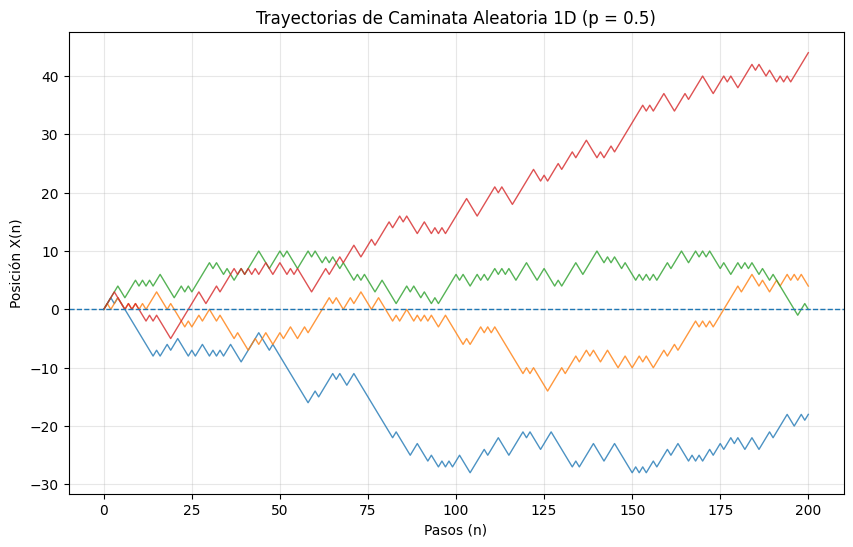

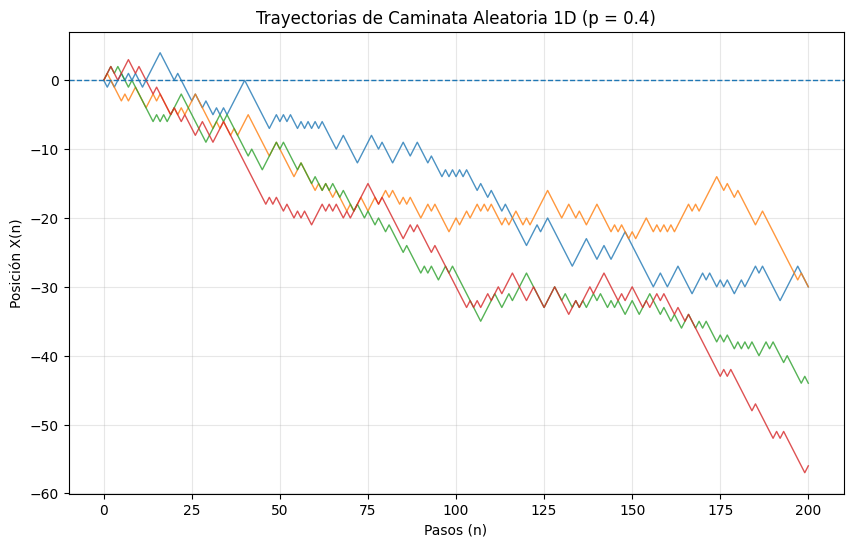

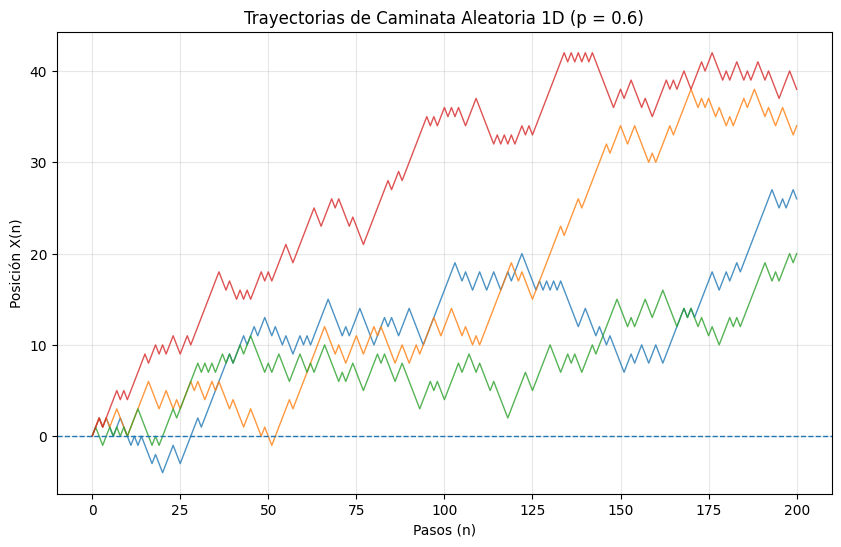

In [140]:
# Parámetros
N = 200 #Número de pasos
M = 4#Número de trayectorias a gráficar

#probabilidades a probar
valores_p = [0.5,0.4,0.6]

for p in valores_p:
   graficar_trayectorias (p, N , M)



Para una caminata aleatoria con pasos

- Si $p=0.5$, la caminata es **simetrica**: la trayectoria fluctúa.

- Si $p>0.5$, tiende a **crecer** hacia la derecha.

- Si $p< 0.5$, tiende a **disminuir**: hacia la izquierda.

Cúal es la media y la varianza

In [141]:
trayectoria = caminata_1d(p, N)
#número total de datos
n= len(trayectoria)

media =sum(trayectoria)/N

print(f"Media: {media}")


Media: 17.98


Dado quer la media nos dio 5.87, esto indica que, en promedio, las posiciones de la trayectoria estuvieron desplazadas hacia el lado positivo.

In [142]:
#calculo de la varianza

varianza =0
for xi in trayectoria:
  varianza += (xi-media)**2
  varianza = varianza/n

print(f"Varianza: {varianza}")

Varianza: 1.6245282004467712


Esto indica que los valores de la trayectoria, respecto a su media, presentan una dispersión moderada.

In [143]:
#desviación estandar

desviacion_estandar = varianza**0.5
print(f"Desviación estandar: {desviacion_estandar}")

Desviación estandar: 1.2745698099542335


considerando que la desviación estandar es aproximadamente 1, podemos decir que en promedio, las posciones de alejan aproximadamente una unidad respecto a la media calculada

In [144]:
def resumen_trayectoria(trayectoria):
    """
    Calcula estadísticas básicas de una trayectoria.
    """
    posicion_final = trayectoria[-1]
    posicion_max = max(trayectoria)
    posicion_min = min(trayectoria)

    # Contar cuántas veces se visitó el origen (posición 0)
    visitas_origen = 0
    for pos in trayectoria:
        if pos == 0:
            visitas_origen += 1

    return posicion_final, posicion_max, posicion_min, visitas_origen

In [145]:
def analizar_una_trayectoria(p, N):
    """
    Genera una trayectoria y muestra resultados básicos.
    """
    t = caminata_1d(p, N)
    final, maxi, mini, visitas0 = resumen_trayectoria(t)

    print("ANÁLISIS DE UNA TRAYECTORIA")
    print("="*35)
    print(f"p = {p}   q = {1-p}")
    print(f"Número de pasos: {N}")
    print(f"Posición final: {final}")
    print(f"Posición máxima: {maxi}")
    print(f"Posición mínima: {mini}")
    print(f"Veces que tocó el origen: {visitas0}")



In [146]:
# -----------------------------------
# ESTADÍSTICAS BÁSICAS DE LA TRAYECTORIA
# -----------------------------------

# Posición final (último elemento de la lista)
posicion_final = trayectoria[-1]

# Posición máxima alcanzada
posicion_max = max(trayectoria)

# Posición mínima alcanzada
posicion_min = min(trayectoria)

# Contar cuántas veces se visitó el origen (posición 0)
visitas_origen = 0

for pos in trayectoria:
    if pos == 0:
        visitas_origen += 1

# Mostrar resultados
print("ANÁLISIS DE UNA TRAYECTORIA")
print("="*40)
print(f"Posición final: {posicion_final}")
print(f"Posición máxima: {posicion_max}")
print(f"Posición mínima: {posicion_min}")
print(f"Veces que tocó el origen: {visitas_origen}")


ANÁLISIS DE UNA TRAYECTORIA
Posición final: 36
Posición máxima: 38
Posición mínima: 0
Veces que tocó el origen: 1


In [147]:
# Analizamos una trayectoria para p=0.5 (puedes cambiarlo)
analizar_una_trayectoria(p=0.5, N=200)


ANÁLISIS DE UNA TRAYECTORIA
p = 0.5   q = 0.5
Número de pasos: 200
Posición final: 4
Posición máxima: 8
Posición mínima: -12
Veces que tocó el origen: 23


Notemos que el valos de $p$ cambia completamente el comportamiento